# Perceptron


**1. Sinh dữ liệu**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)
#Định nghĩa tâm cảu cụm điểm
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 20
X_0 = np.random.multivariate_normal(means[0], cov, N).T # Chứa các điểm thuộc lớp 1
X_1 = np.random.multivariate_normal(means[1], cov, N).T # Chứa các điểm thuộc lớp -1


**2. Chuẩn bị dữ liệu**

In [15]:
X = np.concatenate((X_0, X_1), axis=1) #Ghép 2 nhóm theo chiều ngang
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
#Thêm một hàng 1 vào đầu hàng của X để biểu diễn bias   
print(X.shape)  # Kiểm tra số chiều của X

X = np.concatenate((np.ones((1, 2*N)), X), axis=0)

(2, 40)


**3. Định nghĩa các hàm**

In [17]:
# Hàm tính toán dự đoán
def h(w, x):
    return np.sign(np.dot(w.T, x))
# Hàm kiểm tra hội tụ
def have_converged(X, y, w):
    return np.array_equal(h(w, X), y)
# Thuật toán perceptron
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_point = []
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            x_i = X[:, mix_id[i]].reshape(d, 1)
            y_i = y[0, mix_id[i]]
            if h(w[-1], x_i)[0] != y_i:
                mis_point.append(mix_id[i])
                w_new = w[-1] + y_i*x_i
                w.append(w_new)
        if have_converged(X, y, w[-1]):
            break
    return (w, mis_point)

**Chạy thuật toán**

[np.int32(8), np.int32(33), np.int32(3), np.int32(0), np.int32(22), np.int32(9), np.int32(27), np.int32(14), np.int32(30), np.int32(6), np.int32(35), np.int32(13), np.int32(7), np.int32(20), np.int32(15)]


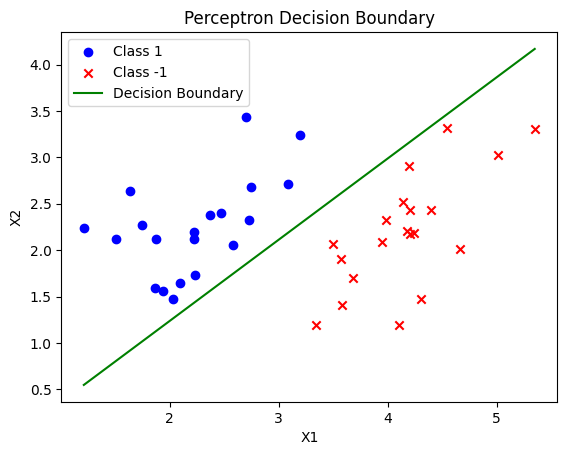

In [20]:
d = X.shape[0]  # Số chiều của dữ liệu (3)
w_init = np.random.randn(d, 1)  # Khởi tạo trọng số ngẫu nhiên (3x1)
(w, m) = perceptron(X, y, w_init)  # Chạy thuật toán
# Lấy trọng số cuối cùng
w_final = w[-1].flatten()
print(m)
# Tạo dữ liệu điểm
plt.scatter(X[1, :N], X[2, :N], marker='o', color='blue', label="Class 1")
plt.scatter(X[1, N:], X[2, N:], marker='x', color='red', label="Class -1")

# Vẽ đường quyết định: w0 + w1*x + w2*y = 0
x_vals = np.linspace(min(X[1, :]), max(X[1, :]), 100)
y_vals = -(w_final[0] + w_final[1] * x_vals) / w_final[2]

plt.plot(x_vals, y_vals, 'g-', label="Decision Boundary")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.show()
